<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [52]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




### Pregunta 1

In [29]:
#No existen datos NULL en el Data Frame. En efecto,

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
#Veamos un resumen de los datos. Notar que hay columnas que no aportan información, como id

df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [31]:
#Creemos un Data Frame con datos solamente Beningnos

Data_Frame_B = df[df["diagnosis"]==0]
Data_Frame_B.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [32]:
#Creemos un Data Frame con datos solamente Malignos

Data_Frame_M = df[df["diagnosis"]==1]
Data_Frame_M.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
Data_Frame_B.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [34]:
Data_Frame_M.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


### Pregunta 2

In [35]:
#Creamos una copia de los datos
scaled_features = df.copy()
#Creamos el nombre de las columnas quitando 'id' y 'diagnosis'
col_names = df.columns.drop(['id','diagnosis'])
#creamos las caracteristicas con col_names
features = scaled_features[col_names]
#Definimos StandardScaler y aplicamos los métodos
scaler = StandardScaler()
scaler_fit = StandardScaler().fit(features.values)
features = scaler_fit.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [36]:
df_scaled = scaled_features.drop(['id','diagnosis'],axis=1)

### Pregunta 3

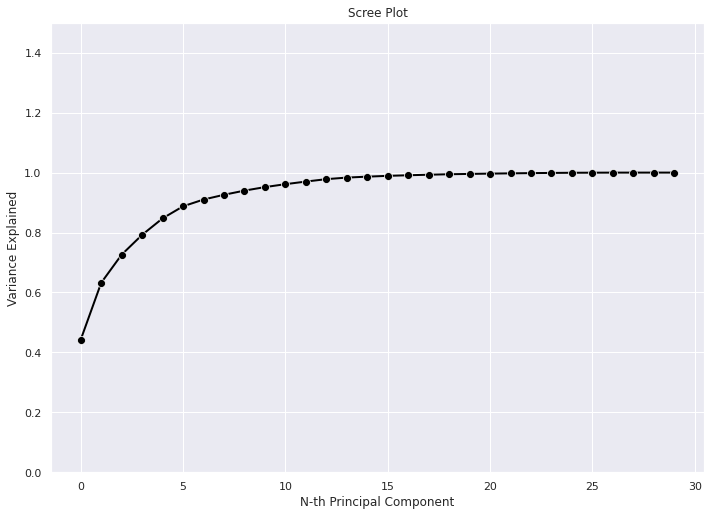

In [37]:
#Usemos modelo PCA para reducir la dimensionalidad del problema

pca = PCA()
_ = pca.fit_transform(df_scaled)
PC_components = np.arange(pca.n_components_)+1
recta = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1.5)
plt.show()

In [38]:
#Dada la visualización anterior, sólo usaremos 10 atributos (columnas) en nuestro modelo

df_scaled=scaled_features.drop(['id','diagnosis',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
       'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [39]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_scaled)

# Se extrae el modelo entrenado del pipeline

modelo_pca = pca_pipe.named_steps['pca']

In [40]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_scaled.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10'
              ]
)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
PC1,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
PC2,-0.313929,-0.147181,-0.284658,-0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
PC3,-0.124428,0.951057,-0.114084,-0.123378,-0.166532,0.058278,0.041146,-0.068554,0.036724,0.113584
PC4,0.029559,0.008916,0.013458,0.013443,-0.107802,-0.185700,-0.166654,-0.072984,0.892998,-0.349332
PC5,-0.031067,-0.219923,-0.005945,-0.019341,-0.843745,0.240183,0.312533,-0.009180,0.112888,0.264878
PC6,-0.264180,-0.032207,-0.237819,-0.331707,0.062225,0.005271,0.601467,0.265613,-0.061957,-0.567919
PC7,-0.044188,0.020557,-0.083369,0.261188,0.011292,-0.803805,0.367136,0.141313,0.047902,0.345214
PC8,0.084834,-0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,-0.850919,0.016456,-0.065259
PC9,-0.474425,-0.004213,-0.380167,0.747347,-0.005847,0.218732,-0.081171,0.022025,-0.009068,-0.129667
PC10,-0.669071,0.000250,0.740491,-0.032359,0.003690,-0.052753,-0.010367,-0.003748,0.001467,0.007057


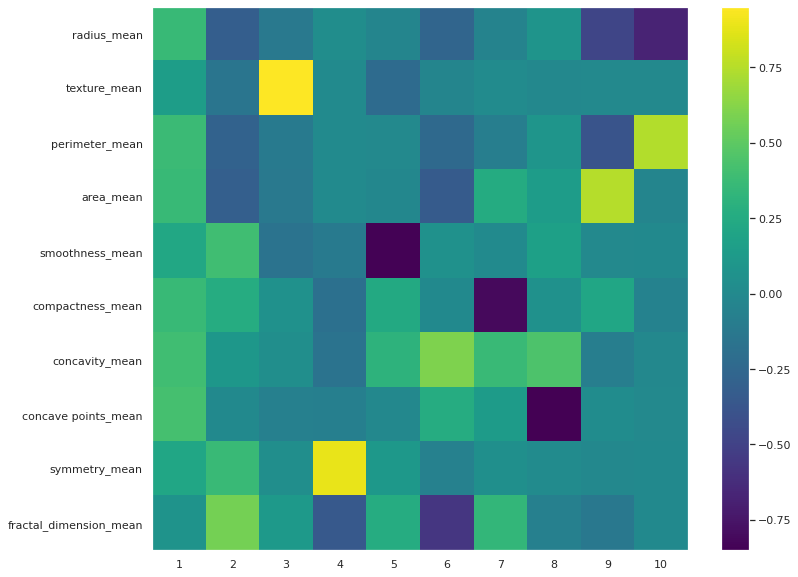

In [41]:
# Heatmap componentes

plt.figure(figsize=(12,10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_scaled.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

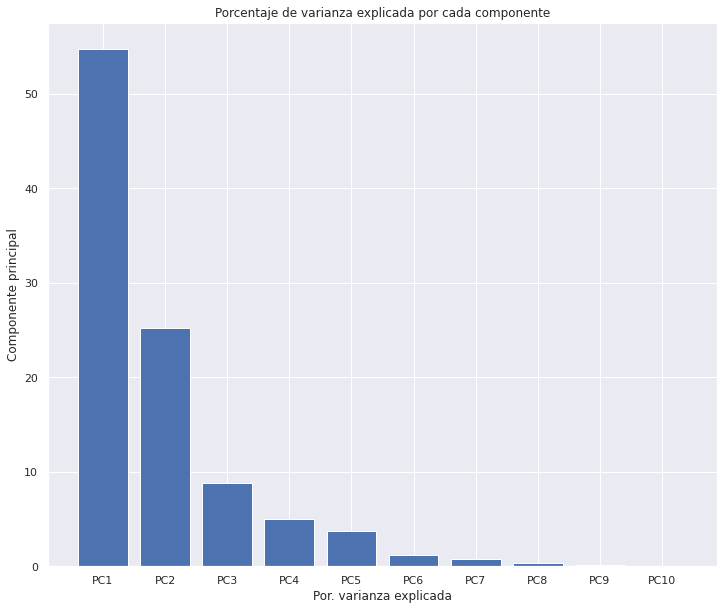

In [42]:
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4',
           'PC5','PC6','PC7','PC8','PC9','PC10'
          ]
plt.figure(figsize=(12,10))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

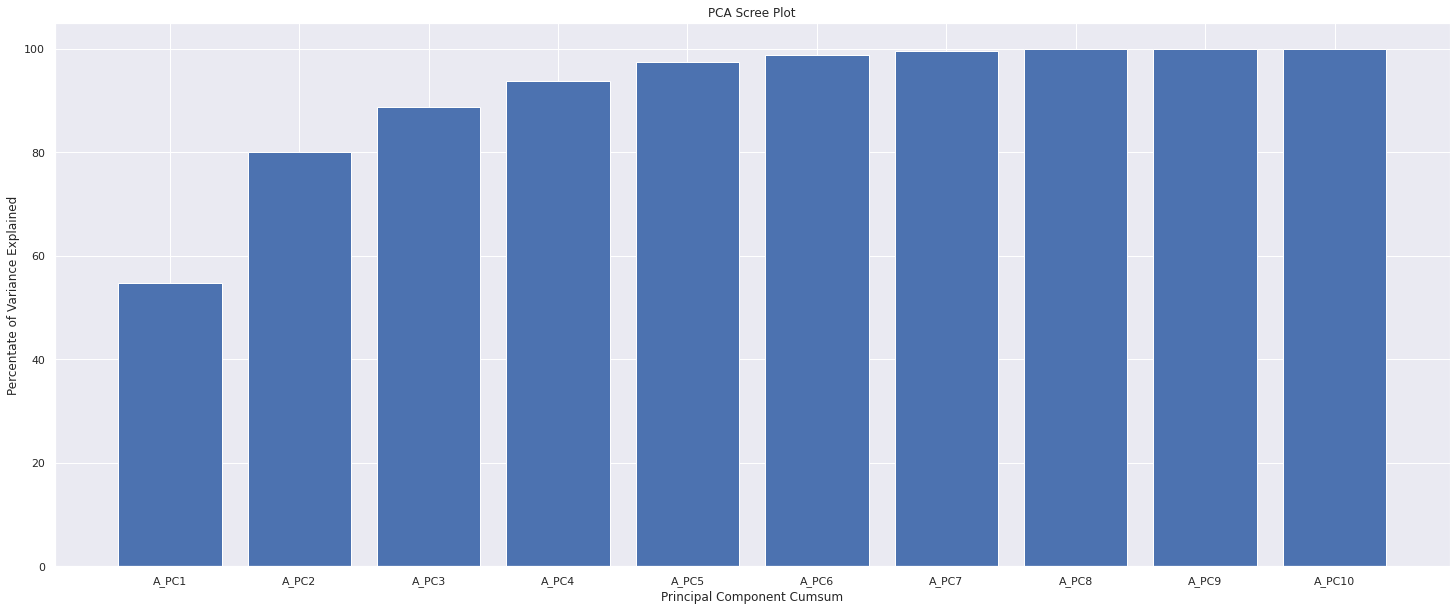

In [43]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['A_PC1','A_PC2','A_PC3','A_PC4','A_PC5','A_PC6',
           'A_PC7','A_PC8','A_PC9','A_PC10']
plt.figure(figsize=(25,10))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [44]:
# Proyección de las observaciones de entrenamiento

proyecciones = pca_pipe.transform(X=df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5', 'PC6', 'PC7', 'PC8',
              'PC9', 'PC10'],
    index   = df_scaled.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,-0.011258
1,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,-0.022992
2,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,-0.022675
3,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,-0.053456
4,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,0.034113


### Pregunta 4

In [48]:
df_scaled_new=scaled_features.drop(['id',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
       'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)

In [49]:
# Datos 
y = df_scaled_new.diagnosis
X = df_scaled_new.drop('diagnosis', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [55]:
#MODELO DE REGRESION LOGISTICA
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predecir
lr_pred = lr.predict(X_test)
y_true =  list(y_test)
y_pred = list(lr.predict(X_test))

#Guardamos los datos para la comparativa final
accuracy1=accuracy_score(y_test, lr_pred)
recall1=recall_score(y_test, lr_pred)
precision1=precision_score(y_test, lr_pred)
fscore1=f1_score(y_test, lr_pred)

In [59]:
#MODELO RANDOMFOREST
rfc =  RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

#predecir
y_true =  list(y_test)
y_pred = list(rfc.predict(X_test)) 

#Guardamos los datos para la comparativa final
accuracy2=accuracy_score(y_true, y_pred)
recall2=recall_score(y_true, y_pred)
precision2=precision_score(y_true, y_pred)
fscore2=f1_score(y_true, y_pred)

In [60]:
#DECISION TREE
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#predecir
y_true =  list(y_test)
y_pred = list(dtree.predict(X_test)) 

#Guardamos los datos para la comparativa final
accuracy3=accuracy_score(y_true, y_pred)
recall3=recall_score(y_true, y_pred)
precision3=precision_score(y_true, y_pred)
fscore3=f1_score(y_true, y_pred)

In [61]:
Datos = {'n_modelo': ['logistic_regression','random_forest','decision_tree'],
          'accuracy': [accuracy1,accuracy2,accuracy3],
          'recall': [recall1,recall2,recall3],
          'precision': [precision1,precision2,precision3],
          'f-score': [fscore1,fscore2,fscore3],
}
AnalisisDeDatos=pd.DataFrame(Datos)
AnalisisDeDatos

,n_modelo,accuracy,recall,precision,f-score
0,logistic_regression,0.916084,0.824561,0.959184,0.886792
1,random_forest,0.944056,0.912281,0.945455,0.928571
2,decision_tree,0.923077,0.859649,0.942308,0.899083


In [63]:
# Necessary imports
 
# Creating the hyperparameter grid
c_space = np.logspace(0.234,1)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10.0}
Best score is 0.9349635149821458
